In [10]:
# Analyzing the correlation between 50 cryptocurrencies

In [1]:
# Install dependencies
! pip install -U pandas_datareader
! pip install -U mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 21.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.6 MB/s 


In [2]:
# Import the libraries
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt

In [3]:
# Set parameters
currency = 'USD'
metric = 'Close'

start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

crypto = [
          'BTC',   # Bitcoin
          'ETH',   # Ethereum
          'USDT',  # Tether
          'USDC',  # USD Coin
          'BNB',   # BNB
          'BUSD',  # Binance USD
          'ADA',   # Cardano
          'XRP',   # XRP
          'SOL',   # Solana
          'DOGE',  # Dogecoin
          'DOT',   # Polkadot
          'HEX',   # HEX
          'DAI',   # Dai
          'WTRX',  # Wrapped TRON 
          'TRX',   # TRON
          'LEO',   # UNUS SED LEO
          'SHIB',  # Shiba Inu
          'WBTC',  # Wrapped Bitcoin
          'AVAX',  # Avalance
          'MATIC', # Polygon
          'LTC',   # Litecoin
          'UNI',   # Uniswap
          'stETH', # Lido stETH
          'FTT',   # FTX Token
          'LINK',  # Chainlink
          'CRO',   # Cronos
          'XLM',   # Stellar
          'NEAR',  # NEAR Protocol
          'ALGO',  # Algorad
          'BCH',   # Bitcoin Cash
          'ATOM',  # Cosmos
          'BTCB',  # Bitcoin BEP2
          'XMR',   # Monero
          'ETC',   # Ethereum Classic
          'XCN', #Chain
          'VET', #VeChain
          'MANA', #Decentraland
          'FLOW', #Flow
          'HBAR', #Hedera
          'FRAX', #Frax
          'ICP', #Internet Computer
          'RGLD', #Elrond
          'TON', #Toncoin
          'FIL', #Filecoin
          'APE', #ApeCoin
          'THETA', #Theta Network
          'XTZ', #Tezos
          'HNT', #Helium
          'SAND', #The Sandbox
          'TUSD', #TrueUSD
          ]
colnames = []

first = True

In [4]:
# Load the data
for ticker in crypto:
  try:
    data = web.DataReader(
        f'{ticker}-{currency}',
        'yahoo',
        start,
        end
    )
    if first:
      combined = data[[metric]].copy()
      colnames.append(ticker)
      combined.columns = colnames
      first = False
    else:
      combined = combined.join(data[metric])
      colnames.append(ticker)
      combined.columns = colnames
  except Exception as e:
    print(e)
df = combined.copy()

No data fetched for symbol RGLD-USD using YahooDailyReader


'RGLD'


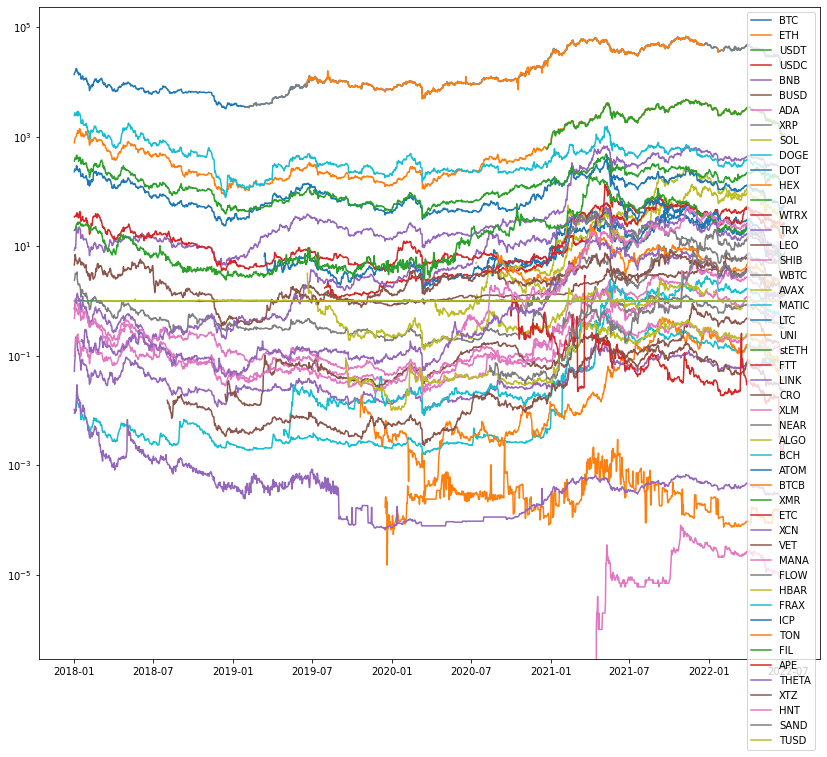

In [5]:
# Plot the data
plt.figure(figsize=(14,12))
plt.yscale('log')
for ticker in crypto:
  try:
    plt.plot(df[ticker], label=ticker)
  except Exception as e:
    print(e)
plt.legend(loc='upper right')
plt.show()

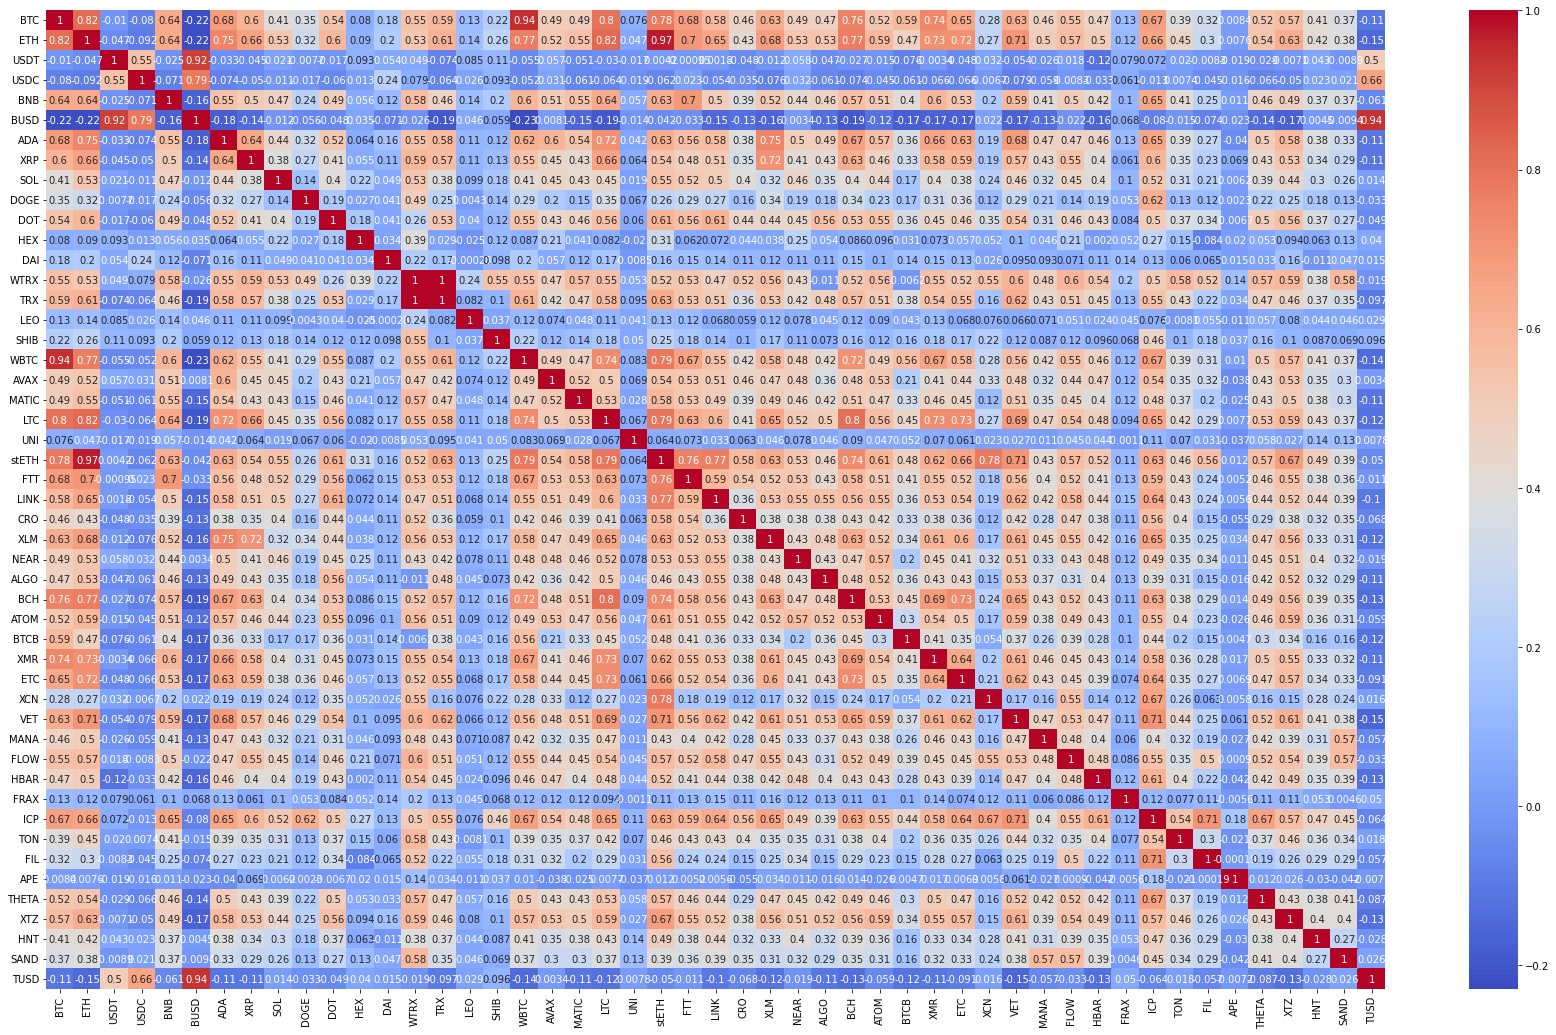

In [9]:
plt.figure(figsize=(30,18))
combined_df = df.pct_change().corr(method='pearson')
sns.heatmap(combined_df, annot=True, cmap='coolwarm')
plt.show()